# Observations

### Observation 1
1. Based on the provided data set, there don't appear to be many outliers when the box plots were generated.

### Observation 2
2. The scatter plot towards the bottom (between mouse weight and tumor volume) and best fit line show that there is a general correlation between the tumor volume size and the weight of the mouse.

### Observation 3
3. Capomulin and Ramicane have the lowest tumor volumes on average, and also have the lowest standard deviations. These appear to be the most effective drugs based on this data

# Review and Cleanup Data

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Study data files
file_1 = "data/Mouse_metadata.csv"
file_2 = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(file_1)
study_data = pd.read_csv(file_2)

# study_data.head()

# Combine the data into a single dataset
combined_df = pd.merge(mouse_data,study_data, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [4]:
# Checking the number of mice.
combined_df["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(["Timepoint", "Mouse ID"], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse.
clean_df = combined_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
# Checking the number of mice in the clean DataFrame.
clean_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

# Summarize Statistics

### Generating Drug Regimen Statistics with Groupby

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# determine mean
combined_mean = clean_df.groupby(["Drug Regimen"]).mean()
combined_mean = combined_mean.rename(columns={"Tumor Volume (mm3)": "Mean tumor Volume"})
combined_tumor_mean = round(combined_mean["Mean tumor Volume"], 2)
combined_tumor_mean

Drug Regimen
Capomulin    40.68
Ceftamin     52.59
Infubinol    52.88
Ketapril     55.24
Naftisol     54.33
Placebo      54.03
Propriva     52.39
Ramicane     40.22
Stelasyn     54.23
Zoniferol    53.24
Name: Mean tumor Volume, dtype: float64

In [8]:
# determine median
combined_median = clean_df.groupby(["Drug Regimen"]).median()
combined_median = combined_median.rename(columns={"Tumor Volume (mm3)": "Median tumor Volume"})
combined_tumor_median = round(combined_median["Median tumor Volume"], 2)
combined_tumor_median

Drug Regimen
Capomulin    41.56
Ceftamin     51.78
Infubinol    51.82
Ketapril     53.70
Naftisol     52.51
Placebo      52.29
Propriva     50.91
Ramicane     40.67
Stelasyn     52.43
Zoniferol    51.82
Name: Median tumor Volume, dtype: float64

In [9]:
# determine variance
combined_variance = clean_df.groupby(["Drug Regimen"]).var()
combined_variance = combined_variance.rename(columns={"Tumor Volume (mm3)": "Variance tumor Volume"})
combined_tumor_variance = round(combined_variance["Variance tumor Volume"], 2)
combined_tumor_variance

Drug Regimen
Capomulin    24.95
Ceftamin     39.29
Infubinol    43.13
Ketapril     68.55
Naftisol     66.17
Placebo      61.17
Propriva     43.14
Ramicane     23.49
Stelasyn     59.45
Zoniferol    48.53
Name: Variance tumor Volume, dtype: float64

In [10]:
# determine standard deviation
combined_std = clean_df.groupby(["Drug Regimen"]).std()
combined_std = combined_std.rename(columns={"Tumor Volume (mm3)": "STD tumor Volume"})
combined_tumor_std = round(combined_std["STD tumor Volume"], 2)
combined_tumor_std

Drug Regimen
Capomulin    4.99
Ceftamin     6.27
Infubinol    6.57
Ketapril     8.28
Naftisol     8.13
Placebo      7.82
Propriva     6.57
Ramicane     4.85
Stelasyn     7.71
Zoniferol    6.97
Name: STD tumor Volume, dtype: float64

In [11]:
# determine SEM
combined_sem = clean_df.groupby(["Drug Regimen"]).sem()
combined_sem = combined_sem.rename(columns={"Tumor Volume (mm3)": "SEM tumor Volume"})
combined_tumor_sem = round(combined_sem["SEM tumor Volume"],2)
combined_tumor_sem

Drug Regimen
Capomulin    0.33
Ceftamin     0.47
Infubinol    0.49
Ketapril     0.60
Naftisol     0.60
Placebo      0.58
Propriva     0.53
Ramicane     0.32
Stelasyn     0.57
Zoniferol    0.52
Name: SEM tumor Volume, dtype: float64

In [12]:
# merge all data series together
tumor_df = pd.merge(combined_tumor_mean, combined_tumor_median, left_index = True, right_index = True)
tumor_df = pd.merge(tumor_df, combined_tumor_variance, left_index = True, right_index = True)
tumor_df = pd.merge(tumor_df, combined_tumor_std, left_index = True, right_index = True)
tumor_df = pd.merge(tumor_df, combined_tumor_sem, left_index = True, right_index = True)
tumor_df

,Mean tumor Volume,Median tumor Volume,Variance tumor Volume,STD tumor Volume,SEM tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


### Generating Drug Regimen Statistics with .agg

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg = clean_df.groupby("Drug Regimen").agg(Mean=("Tumor Volume (mm3)", "mean"),
                                                Median = ("Tumor Volume (mm3)", "median"),
                                                Variance = ("Tumor Volume (mm3)", "var"),
                                                St_Dev =("Tumor Volume (mm3)", "std"),
                                                SEM =("Tumor Volume (mm3)", "sem"))
# round DF to make more readable                                                  
tumor_agg = tumor_agg.round(decimals=2)
tumor_agg


,Mean,Median,Variance,St_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Plots/Charts

### Bar Chart using Pandas

In [14]:
# create bar chart showing number of timpeoints for a certain drug regimen (using Pandas)
drugs = clean_df['Drug Regimen'].value_counts()
drugs

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

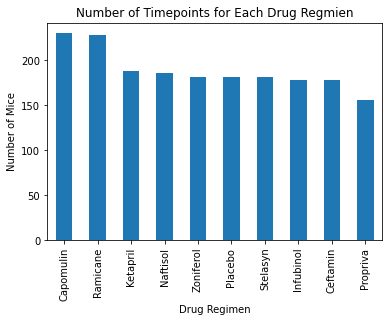

In [15]:
# generate bar chart using Pandas
drugs.plot(kind = 'bar', xlabel="Drug Regimen", ylabel="Number of Mice",title="Number of Timepoints for Each Drug Regmien")
plt.show()

### Bar Chart using Matplotlib

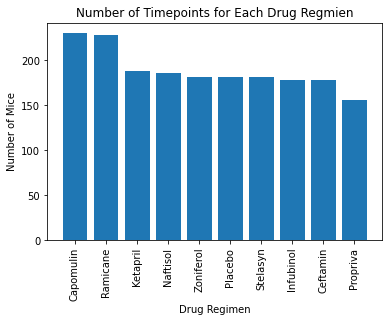

In [16]:
# create bar chart showing number of timpeoints for a certain drug regimen (using Matplotlib)
plt.bar(drugs.index, drugs.values)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Timepoints for Each Drug Regmien")
plt.show()

Male      958
Female    930
Name: Sex, dtype: int64

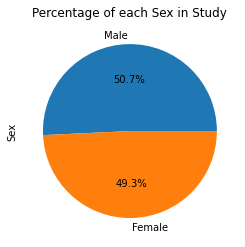

In [17]:
# create pie chart showing sex of mice (using Pandas)
genders = clean_df['Sex'].value_counts()
genders.plot(kind = 'pie', autopct='%1.1f%%', title = "Percentage of each Sex in Study")
genders

In [18]:
# convert genders series created above to a dataframe to be able to use in plt.bar functiongenders = genders.to_frame()
genders_index = genders.reset_index()
genders_index

,index,Sex
0,Male,958
1,Female,930


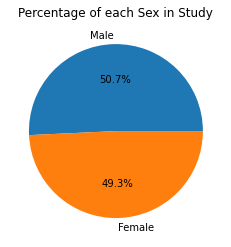

In [19]:
# create pie chart showing sex of mice (using Matplotlib)
plt.pie(genders_index["Sex"], labels = genders_index["index"],autopct="%1.1f%%")
plt.title("Percentage of each Sex in Study")
plt.show()

# Box Plots - Quartiles, and Outliers

### Create new lists/dataframes to be used for calculations

In [20]:
# group cleaned up df by mouse ID and the max to show the maximum timepoint for each mouse
max_TP_df = clean_df.groupby("Mouse ID").max()
max_TP_df = max_TP_df[["Timepoint"]]
max_TP_df = max_TP_df.reset_index()
max_TP_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [21]:
# merge original cleaned df with new df that groupby the mouse ID and shows max timeepoint value
max_TP_combined = pd.merge(clean_df, max_TP_df, on = "Mouse ID", how="right")
# rename x timepoint to all timepoints and y timepoints as the max timepoint
max_TP_combined = max_TP_combined.rename(columns = {"Timepoint_x": "All Timepoints", "Timepoint_y":"Max Timepoint"})
# simplify the DF to get rid of all the timepoints that are NOT the max timepoints
max_TP_combined = max_TP_combined.loc[max_TP_combined["All Timepoints"] == max_TP_combined["Max Timepoint"], :]
max_TP_combined.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),All Timepoints,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,a203,Infubinol,Female,20,23,45,67.973419,2,45
19,a251,Infubinol,Female,21,25,45,65.525743,1,45
29,a262,Placebo,Female,17,29,45,70.717621,4,45
39,a275,Ceftamin,Female,20,28,45,62.999356,3,45
46,a366,Stelasyn,Female,16,29,30,63.440686,1,30


In [22]:
# now that only max timepoint rows are in table, delete the original timepoints column
del max_TP_combined["All Timepoints"]

In [23]:
max_TP_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,a203,Infubinol,Female,20,23,67.973419,2,45
19,a251,Infubinol,Female,21,25,65.525743,1,45
29,a262,Placebo,Female,17,29,70.717621,4,45
39,a275,Ceftamin,Female,20,28,62.999356,3,45
46,a366,Stelasyn,Female,16,29,63.440686,1,30


In [24]:
# create empty list for Capomulin, then list comprehension to fill in list
tumor_volume_capomulin = []
tumor_volume_capomulin = [max_TP_combined.loc[x, "Tumor Volume (mm3)"] for x in max_TP_combined.index if max_TP_combined.loc[x, "Drug Regimen"] == "Capomulin" ]
tumor_volume_capomulin                      

[38.98287774,
 38.93963263,
 30.48598484,
 37.07402422,
 40.1592203,
 47.68596303,
 37.31184577,
 38.1251644,
 38.75326548,
 41.48300765,
 38.84687569,
 28.43096411,
 33.32909778,
 46.53920617,
 32.37735684,
 41.58152074,
 23.34359787,
 40.72857787,
 34.45529799,
 31.02392294,
 40.65812366,
 39.95234669,
 36.04104736,
 28.48403281,
 31.8962384]

In [25]:
# create empty list for Ramicane, then list comprehension to fill in list
tumor_volume_ramicane = []
tumor_volume_ramicane = [max_TP_combined.loc[x, "Tumor Volume (mm3)"] for x in max_TP_combined.index if max_TP_combined.loc[x, "Drug Regimen"] == "Ramicane" ]
tumor_volume_ramicane    

[38.4076183,
 43.0475426,
 38.81036633,
 32.97852192,
 38.34200823,
 33.39765251,
 37.31123552,
 40.65900627,
 29.12847181,
 33.56240217,
 36.37451039,
 31.56046955,
 36.13485243,
 22.05012627,
 30.56462509,
 31.09533505,
 45.22086888,
 36.56165229,
 37.22565033,
 43.41938077,
 30.27623175,
 40.66771292,
 43.16637266,
 44.18345092,
 30.63869575]

In [26]:
# create empty list for Infubinol, then list comprehension to fill in list
tumor_volume_infubinol = []
tumor_volume_infubinol = [max_TP_combined.loc[x, "Tumor Volume (mm3)"] for x in max_TP_combined.index if max_TP_combined.loc[x, "Drug Regimen"] == "Infubinol" ]
tumor_volume_infubinol   

[67.97341878,
 65.52574285,
 57.03186187,
 66.08306589,
 72.2267309,
 36.3213458,
 60.96971133,
 62.43540402,
 60.91876652,
 67.28962147,
 66.19691151,
 62.11727887,
 47.01036401,
 60.16518046,
 55.62942846,
 45.69933088,
 54.65654872,
 55.65068132,
 46.25011212,
 54.04860769,
 51.54243058,
 50.00513807,
 58.26844248,
 67.68556862,
 62.75445141]

In [27]:
# create empty list for Ceftamin, then list comprehension to fill in list
tumor_volume_ceftamin = []
tumor_volume_ceftamin = [max_TP_combined.loc[x, "Tumor Volume (mm3)"] for x in max_TP_combined.index if max_TP_combined.loc[x, "Drug Regimen"] == "Ceftamin" ]
tumor_volume_ceftamin     

[62.99935619,
 45.0,
 56.05774909,
 55.74282869,
 48.72207785,
 47.7846818,
 61.84902336,
 68.92318457,
 67.74866174,
 57.91838132,
 46.78453491,
 59.85195552,
 64.29983003,
 59.74190064,
 61.43389223,
 64.19234114,
 45.0,
 52.92534846,
 45.0,
 67.52748237,
 45.0,
 64.63494887,
 61.38666032,
 68.59474498,
 64.72983655]

In [28]:
# create DF from list to allow for quantile/bound calculations to be performed
tumor_volume_capomulin_df = pd.DataFrame()
tumor_volume_capomulin_df["Tumor Volume"] = tumor_volume_capomulin
tumor_volume_capomulin_df

,Tumor Volume
0,38.982878
1,38.939633
2,30.485985
3,37.074024
4,40.159220
5,47.685963
6,37.311846
7,38.125164
8,38.753265
9,41.483008


### Quartiles/Outlier Calculations

In [29]:
# quantiles function for Capomulin
quartiles_capomulin = tumor_volume_capomulin_df["Tumor Volume"].quantile([0.25, 0.5, 0.75])

In [30]:
#calculate bounds
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

# display bounds/characteristics for reference
print(f"The lower quartile of Capomulin is: {lowerq_capomulin}")
print(f"The upper quartile of Capomulin is: {upperq_capomulin}")
print(f"The interquartile range of Capomulin is: {iqr_capomulin}")
print(f"The the median of Capomulin is: {quartiles_capomulin[0.5]} ")

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
print(f"Values below {lower_bound_capomulin} could be outliers.")
print(f"Values above {upper_bound_capomulin} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [31]:
# determine Capomlulin outliers and display
outlier_capomulin= tumor_volume_capomulin_df.loc[(tumor_volume_capomulin_df['Tumor Volume'] < lower_bound_capomulin) | (tumor_volume_capomulin_df['Tumor Volume'] > upper_bound_capomulin)]
outlier_capomulin
# NOTE: IF TABLE EMPTY, THERE ARE NO OUTLIERS

,Tumor Volume


In [32]:
# create DF from list to allow for quantile/bound calculations to be performed
tumor_volume_ramicane_df = pd.DataFrame()
tumor_volume_ramicane_df["Tumor Volume"] = tumor_volume_ramicane
tumor_volume_ramicane_df

,Tumor Volume
0,38.407618
1,43.047543
2,38.810366
3,32.978522
4,38.342008
5,33.397653
6,37.311236
7,40.659006
8,29.128472
9,33.562402


In [33]:
# quantiles function for Ramicane
quartiles_ramicane = tumor_volume_ramicane_df["Tumor Volume"].quantile([0.25, 0.5, 0.75])

#calculate bounds
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

# display bounds/characteristics for reference
print(f"The lower quartile of Ramicane is: {lowerq_ramicane}")
print(f"The upper quartile of Ramicane is: {upperq_ramicane}")
print(f"The interquartile range of Ramicane is: {iqr_ramicane}")
print(f"The the median of Ramicane is: {quartiles_ramicane[0.5]} ")

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
print(f"Values below {lower_bound_ramicane} could be outliers.")
print(f"Values above {upper_bound_ramicane} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [34]:
# determine Ramicane outliers and display
outlier_ramicane= tumor_volume_ramicane_df.loc[(tumor_volume_ramicane_df['Tumor Volume'] < lower_bound_ramicane) | (tumor_volume_ramicane_df['Tumor Volume'] > upper_bound_ramicane)]
outlier_ramicane
# NOTE: IF TABLE EMPTY, THERE ARE NO OUTLIERS

,Tumor Volume


In [35]:
# create DF from list to allow for quantile/bound calculations to be performed
tumor_volume_infubinol_df = pd.DataFrame()
tumor_volume_infubinol_df["Tumor Volume"] = tumor_volume_infubinol
tumor_volume_infubinol_df

,Tumor Volume
0,67.973419
1,65.525743
2,57.031862
3,66.083066
4,72.226731
5,36.321346
6,60.969711
7,62.435404
8,60.918767
9,67.289621


In [36]:
# quantiles function for Ramicane
quartiles_infubinol = tumor_volume_infubinol_df["Tumor Volume"].quantile([0.25, 0.5, 0.75])

# calculate bounds
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

# display bounds/characteristics for reference
print(f"The lower quartile of Infubinol is: {lowerq_infubinol}")
print(f"The upper quartile of Infubinol is: {upperq_infubinol}")
print(f"The interquartile range of Infubinol is: {iqr_infubinol}")
print(f"The the median of Infubinol is: {quartiles_infubinol[0.5]} ")

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [37]:
# determine Infubinol outliers and display
outlier_infubinol= tumor_volume_infubinol_df.loc[(tumor_volume_infubinol_df['Tumor Volume'] < lower_bound_infubinol) | (tumor_volume_infubinol_df['Tumor Volume'] > upper_bound_infubinol)]
outlier_infubinol
# NOTE: IF TABLE EMPTY, THERE ARE NO OUTLIERS

,Tumor Volume
5,36.321346


In [38]:
# create DF from list to allow for quantile/bound calculations to be performed
tumor_volume_ceftamin_df = pd.DataFrame()
tumor_volume_ceftamin_df["Tumor Volume"] = tumor_volume_ceftamin
tumor_volume_ceftamin_df

,Tumor Volume
0,62.999356
1,45.000000
2,56.057749
3,55.742829
4,48.722078
5,47.784682
6,61.849023
7,68.923185
8,67.748662
9,57.918381


In [39]:
# quantiles function for Ramicane
quartiles_ceftamin = tumor_volume_ceftamin_df["Tumor Volume"].quantile([0.25, 0.5, 0.75])

# calculate bounds
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

# display bounds/characteristics for reference
print(f"The lower quartile of Ceftamin is: {lowerq_ceftamin}")
print(f"The upper quartile of Ceftamin is: {upperq_ceftamin}")
print(f"The interquartile range of Ceftamin is: {iqr_ceftamin}")
print(f"The the median of Ceftamin is: {quartiles_ceftamin[0.5]} ")

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)
print(f"Values below {lower_bound_ceftamin} could be outliers.")
print(f"Values above {upper_bound_ceftamin} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [40]:
# determine Ceftamin outliers and display
outlier_ceftamin= tumor_volume_ceftamin_df.loc[(tumor_volume_ceftamin_df['Tumor Volume'] < lower_bound_ceftamin) | (tumor_volume_ceftamin_df['Tumor Volume'] > upper_bound_ceftamin)]
outlier_ceftamin
# NOTE: IF TABLE EMPTY, THERE ARE NO OUTLIERS

,Tumor Volume


### Generage Box Plot

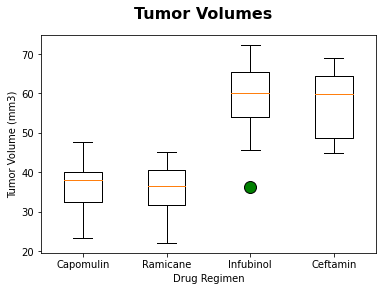

In [41]:
# setup a list of dataframes to be used in boxplots
data = [tumor_volume_capomulin, tumor_volume_ramicane, tumor_volume_infubinol,tumor_volume_ceftamin]

# generate subplots and provdie title
fig, ax1 = plt.subplots()
fig.suptitle("Tumor Volumes", fontsize=16, fontweight="bold")

# asxis labels
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel('Tumor Volume (mm3)')

# settings for outlier properties to be plugged into boxplot
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
ax1.boxplot(data, flierprops = flierprops)

#change x label tickers to drug names
ax1.set_xticks([1,2,3,4],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

# Create Line and Scatter Plot

### Create Line Plot

In [42]:
# finding a mouse to select from the clean DF to help create a line plot
# select columns wanted
capomulin_mouse = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"), ["Mouse ID", "Drug Regimen", "Weight (g)", "Timepoint", "Tumor Volume (mm3)"]]

capomulin_mouse

,Mouse ID,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,17,0,45.000000
11,s185,Capomulin,17,5,43.878496
12,s185,Capomulin,17,10,37.614948
13,s185,Capomulin,17,15,38.177232
14,s185,Capomulin,17,20,36.866876
...,...,...,...,...,...
440,i557,Capomulin,24,45,47.685963
1452,r157,Capomulin,25,0,45.000000
1453,r157,Capomulin,25,5,45.597064
1454,r157,Capomulin,25,10,46.059608


In [43]:
# selecting a specific mouse
capomulin_mouse = capomulin_mouse.loc[capomulin_mouse["Mouse ID"] == "s185", :]
capomulin_mouse

,Mouse ID,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,17,0,45.000000
11,s185,Capomulin,17,5,43.878496
12,s185,Capomulin,17,10,37.614948
13,s185,Capomulin,17,15,38.177232
14,s185,Capomulin,17,20,36.866876
15,s185,Capomulin,17,25,33.949940
16,s185,Capomulin,17,30,32.959671
17,s185,Capomulin,17,35,28.328531
18,s185,Capomulin,17,40,25.472143
19,s185,Capomulin,17,45,23.343598


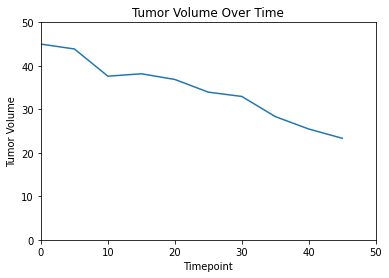

In [44]:
# generate line plot using matplotlib
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume Over Time")
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()

### Create Scatter Plot

In [45]:
# finding a mouse to select from the clean DF to help create a scatter plot
# select columns wanted
capomulin_scatter = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"), ["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]

# organize groupby by the mean to be able to plot mean weight and tumor volume
capomulin_scatter = capomulin_scatter.groupby("Mouse ID").mean()
capomulin_scatter

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


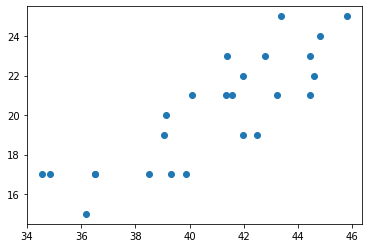

In [46]:
# generate scatter plot based on the mean tumor volume and mean mouse weight
plt.scatter(capomulin_scatter["Tumor Volume (mm3)"], capomulin_scatter["Weight (g)"])
plt.show()

### Determine Correlation Coefficent

In [47]:
correlation = st.pearsonr(capomulin_scatter['Tumor Volume (mm3)'],capomulin_scatter['Weight (g)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


### Plot Linear Regression

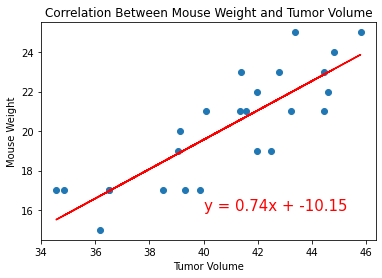

In [48]:
# set up the values of the plot to help determine linear regression equation
x_values = capomulin_scatter['Tumor Volume (mm3)']
y_values = capomulin_scatter['Weight (g)']

# perform linear regression equations
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,16),fontsize=15,color="red")
plt.xlabel('Tumor Volume')
plt.ylabel('Mouse Weight')
plt.title("Correlation Between Mouse Weight and Tumor Volume")
plt.show()